In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
# Reading Data
data = pd.read_csv('Desktop/q2/Adops & Data Scientist Sample Data - Q2 Regression.csv')
print(data.shape)
data.head()

(300, 3)


,1,2,3
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


In [ ]:
X = data[:, 0].reshape(-1,1) # -1 tells numpy to figure out the dimension by itself
ones = np.ones([X.shape[0], 1]) # create a array containing only ones 
X = np.concatenate([ones, X],1) # cocatenate the ones to X matrix
y = my_data[:, 1].reshape(-1,1) # create the y matrix

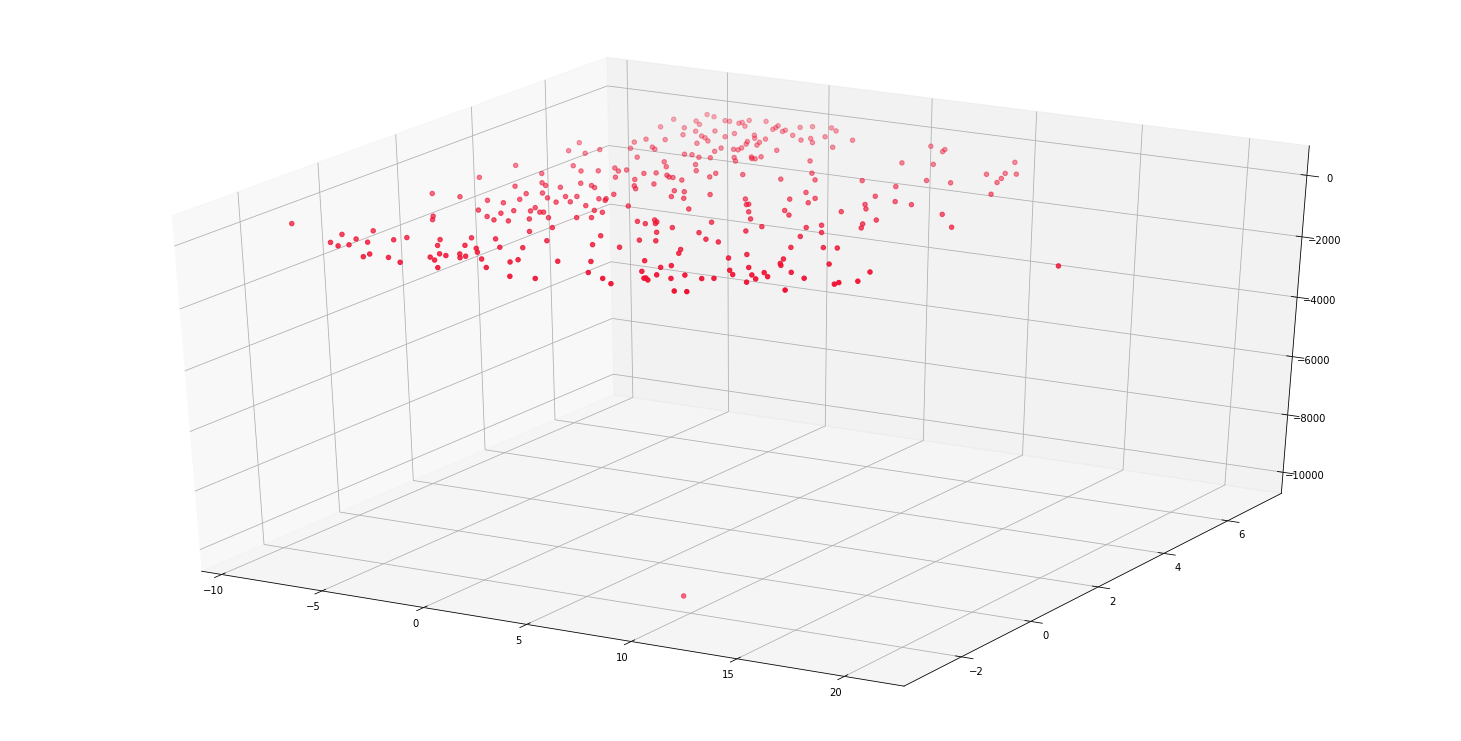

In [94]:
col1 = data['1'].values
col2 = data['2'].values
Result = data['3'].values

# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(col1, col2, Result, color='#ef1234')
plt.show()

In [109]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 3)
s

array([-0.10090751, -0.08981086,  0.10230758])

In [174]:
m = len(col1)
x0 = np.ones(m) 
X = np.array([x0, col1, col2]).T
# Initial Coefficients
mu, sigma = 0, 0.1 # mean and standard deviation
B = np.random.normal(mu, sigma, 3)
Y = np.array(Result)
alpha = 0.0001

In [228]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [176]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

169290.12304336118


In [177]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [178]:
# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[-19.22431432  -8.07114873  -1.78879349]
167344.13749301052


In [180]:
outputs = X.dot(newB)

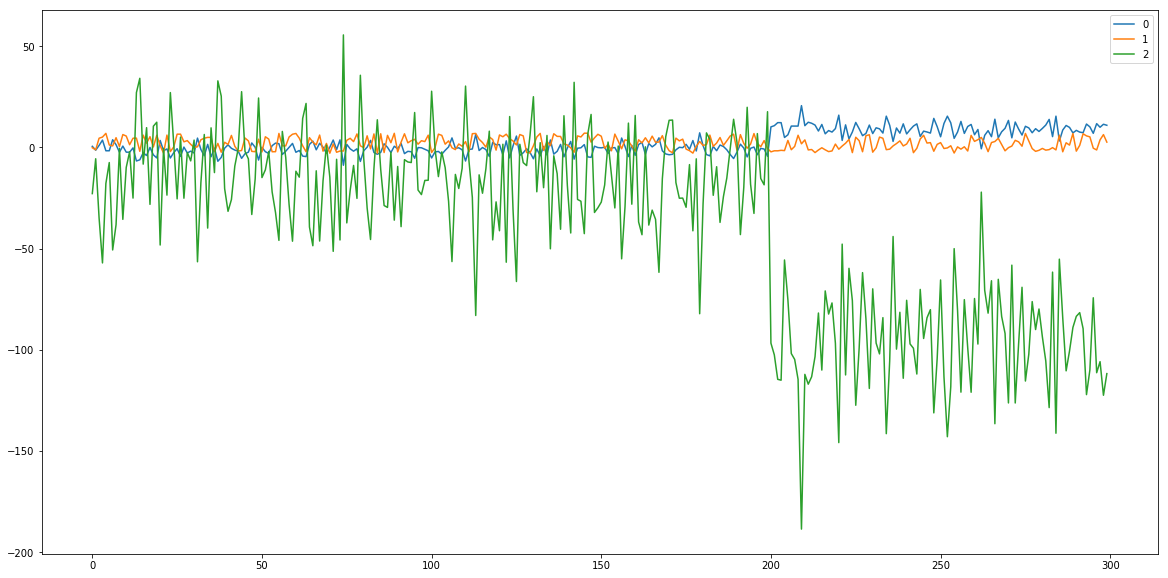

In [181]:
pd.DataFrame([col1, col2, outputs]).T.plot()

In [208]:
df = pd.DataFrame(data=[col1, col2, outputs])
df.index = ['1', '2','3']
df = df.T

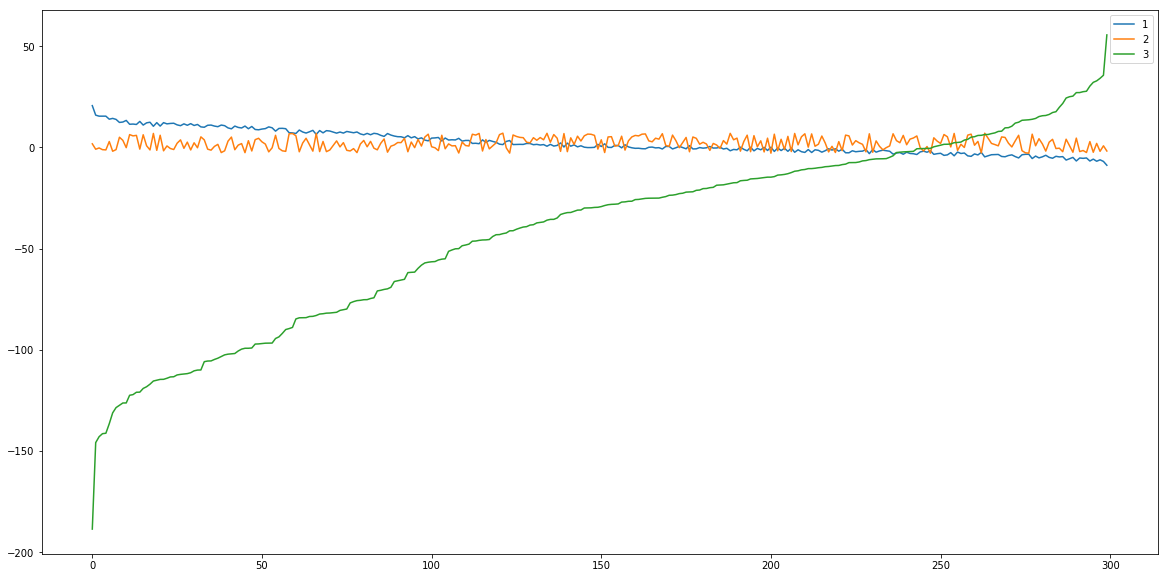

In [223]:
# sorting and plotting 
dfsorted = df.sort_values(by='3', axis=0).reset_index(drop=True)
#plt.scatter(dfsorted['1'], dfsorted['2'])
dfsorted.plot()